In [194]:
# EDA 사전 세팅
%matplotlib inline

import os
from functools import reduce
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) ## 모든 열을 출력한다.
import seaborn as sns  #데이터 시각화 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
sns.set(font="AppleGothic", 

        rc={"axes.unicode_minus":False},
        
        style='darkgrid')

In [195]:
train = pd.read_csv("/Users/choejeehyuk/분석에 필요한 데이터/신용커드 예측 경진대회/df_train.csv")
test = pd.read_csv("/Users/choejeehyuk/분석에 필요한 데이터/신용커드 예측 경진대회/test_df.csv")
train.head(5)

,car,reality,child_num,income_type,family_type,house_type,occyp_type,credit,month_ap,family-child,family_size,income_total,DAYS_EMPLOYED,begin_month,new_age,aver_dep,year_income
0,N,Y,1,Commercial associate,Civil marriage,House / apartment,Laborers,1,3,2.0,3.0,247500.0,1540,5.0,31,82500.0,61875.0
1,Y,Y,0,Working,Married,House / apartment,Managers,2,3,2.0,2.0,450000.0,4434,22.0,52,225000.0,37500.0
2,N,Y,0,Commercial associate,Married,House / apartment,Sales staff,0,9,2.0,2.0,202500.0,2092,37.0,41,101250.0,40500.0
3,Y,Y,0,State servant,Married,House / apartment,Managers,2,10,2.0,2.0,157500.0,2105,26.0,41,78750.0,31500.0
4,N,Y,2,Working,Married,House / apartment,High skill tech staff,1,10,2.0,4.0,270000.0,4996,18.0,37,67500.0,20769.0


In [67]:
#train = pd.read_csv("/Users/choejeehyuk/분석에 필요한 데이터/신용커드 예측 경진대회/train_data.csv")
#test = pd.read_csv("/Users/choejeehyuk/분석에 필요한 데이터/신용커드 예측 경진대회/test_df.csv")
#train.head(5)

,Unnamed: 0,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,new_age,근속연수,근속월수,임용 월,임용 주,고용전 날 수,고용비율,인당 평균 부양비,연봉,자녀 제외 가족 구성원 수
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,13899,4709,0,0,0,NaN,2.0,6.0,1.0,38,12,156,0.0,0.0,9190,0.338801,101250.0,16875.0,2.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,11380,1540,0,0,1,Laborers,3.0,5.0,1.0,31,4,51,3.0,0.0,9840,0.135325,82500.0,61875.0,2.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,19087,4434,0,1,0,Managers,2.0,22.0,2.0,52,12,147,3.0,1.0,14653,0.232305,225000.0,37500.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,15088,2092,0,1,0,Sales staff,2.0,37.0,0.0,41,5,69,9.0,2.0,12996,0.138653,101250.0,40500.0,2.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,15037,2105,0,0,0,Managers,2.0,26.0,2.0,41,5,70,10.0,0.0,12932,0.139988,78750.0,31500.0,2.0


In [196]:
train = train.replace({'year_income' : np.inf}, 0)
#test = test.replace({'year_income' : np.inf}, 0) 

In [197]:
train['begin_month'] = round(abs(train['begin_month']))
#test['begin_month'] = round(abs(test['begin_month']))

In [198]:
def list_sep (data):
  cat_list = []
  int_list = []
  for i in data.columns:
    if data[i].dtypes == 'O':
      cat_list.append(i)
    else :
      int_list.append(i)

  return int_list, cat_list

In [199]:
int_list, cat_list = list_sep(train)
print('int : ',int_list)
print('cat : ',cat_list)

int :  ['child_num', 'credit', 'month_ap', 'family-child', 'family_size ', 'income_total', 'DAYS_EMPLOYED', 'begin_month', 'new_age', 'aver_dep', 'year_income']
cat :  ['car', 'reality', 'income_type', 'family_type', 'house_type', 'occyp_type']


In [136]:
cat_list = ['work_phone', 'phone', 'email', 'gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type']

In [200]:
#for df in [train]:
#    df['income_total'] = np.log1p(df['income_total'])
#    df['DAYS_BIRTH'] = np.log1p(df['DAYS_BIRTH'])
#    df['연봉'] = np.log1p(df['연봉'])
#    df['인당 평균 부양비'] = np.log1p(df['인당 평균 부양비'])
#    df['고용전 날 수'] = np.log1p(df['고용전 날 수'])
#train

for df in [train]:
    df['income_total'] = np.log1p(df['income_total'])
    df['year_income'] = np.log1p(df['year_income'])
    df['aver_dep'] = np.log1p(df['aver_dep'])
train

,car,reality,child_num,income_type,family_type,house_type,occyp_type,credit,month_ap,family-child,family_size,income_total,DAYS_EMPLOYED,begin_month,new_age,aver_dep,year_income
0,N,Y,1,Commercial associate,Civil marriage,House / apartment,Laborers,1,3,2.0,3.0,12.419170,1540,5.0,31,11.320566,11.032888
1,Y,Y,0,Working,Married,House / apartment,Managers,2,3,2.0,2.0,13.017005,4434,22.0,52,12.323860,10.532123
2,N,Y,0,Commercial associate,Married,House / apartment,Sales staff,0,9,2.0,2.0,12.218500,2092,37.0,41,11.525358,10.609082
3,Y,Y,0,State servant,Married,House / apartment,Managers,2,10,2.0,2.0,11.967187,2105,26.0,41,11.274046,10.357775
4,N,Y,2,Working,Married,House / apartment,High skill tech staff,1,10,2.0,4.0,12.506181,4996,18.0,37,11.119898,9.941265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18275,N,Y,0,Working,Married,House / apartment,Accountants,1,2,2.0,2.0,12.218500,803,44.0,35,11.525358,11.525358
18276,N,N,2,State servant,Married,House / apartment,Core staff,1,6,2.0,4.0,12.323860,1984,2.0,33,10.937579,10.714440
18277,Y,N,0,Working,Civil marriage,With parents,Core staff,2,7,2.0,2.0,12.586223,2015,25.0,28,11.893080,10.976799
18278,N,Y,0,Working,Single / not married,House / apartment,Laborers,2,3,1.0,1.0,12.049425,107,59.0,28,12.049425,0.000000


In [201]:
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from category_encoders.ordinal import OrdinalEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import KMeans

In [202]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_data = train.drop(['credit'], axis=1)
y_label = train['credit']

X_train , X_test , y_train , y_test = train_test_split(X_data , y_label , test_size=0.2 , random_state=0)

In [111]:
encoder = OrdinalEncoder(cat_list)
train[cat_list] = encoder.fit_transform([cat_list], train['credit'])
# f_test[cat_list] = encoder.transform(f_test[cat_list])

In [203]:
encoder = OrdinalEncoder(cat_list)
X_train[cat_list] = encoder.fit_transform(X_train[cat_list])
# f_test[cat_list] = encoder.transform(f_test[cat_list])

In [204]:
X_test[cat_list] = encoder.transform(X_test[cat_list])

In [205]:
X_train

,car,reality,child_num,income_type,family_type,house_type,occyp_type,month_ap,family-child,family_size,income_total,DAYS_EMPLOYED,begin_month,new_age,aver_dep,year_income
17737,1,1,0,1,1,1,1,6,2.0,2.0,12.419170,2361,32.0,48,11.726027,10.627431
8713,2,1,2,2,1,1,2,2,2.0,4.0,12.149508,799,21.0,38,10.763229,11.456366
3481,1,2,1,2,1,1,2,0,2.0,3.0,12.506181,5422,7.0,37,11.407576,9.867135
320,2,1,0,1,1,1,1,5,2.0,2.0,11.967187,1610,30.0,29,11.274046,10.580912
15190,1,2,0,1,1,1,1,11,2.0,2.0,11.119898,2149,27.0,50,10.426765,9.510519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,2,1,1,1,1,1,1,11,2.0,3.0,11.813037,1779,25.0,27,10.714440,10.426765
13123,1,1,2,1,1,2,1,11,2.0,4.0,12.323860,341,22.0,42,10.937579,0.000000
9845,1,1,1,1,2,6,4,10,2.0,3.0,12.506181,1753,35.0,31,11.407576,11.119898
10799,1,2,1,1,1,1,4,0,2.0,3.0,12.218500,3266,51.0,32,11.119898,10.139073


In [ ]:
int_list = ['DAYS_EMPLOYED', 'begin_month', 'new_age', '근속월수']

# int_list_test = ['DAYS_EMPLOYED', 'begin_month', 'new_age']


scaler = MinMaxScaler()
X_train[int_list] = scaler.fit_transform(X_train[int_list])
#f_test[int_list_test] = scaler.transform(f_test[int_list_test])

KeyError: "['근속월수'] not in index"

In [38]:
train.drop(['Unnamed: 0'], axis=1, inplace = True)

In [39]:
train

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,new_age,근속연수,근속월수,임용 월,임용 주,고용전 날 수,고용비율,인당 평균 부양비,연봉,자녀 제외 가족 구성원 수
0,1,1,1,0,12.218500,1,1,1,1,9.539644,0.299688,0,0,0,1,2.0,0.100000,1.0,0.354167,12,0.298279,0.0,0.0,9.125980,0.338801,11.525358,9.733648,2.0
1,1,1,2,1,12.419170,1,2,2,2,9.339701,0.098008,0,0,1,2,3.0,0.083333,1.0,0.208333,4,0.097514,3.0,0.0,9.194313,0.135325,11.320566,11.032888,2.0
2,2,2,2,0,13.017005,2,1,1,2,9.856815,0.282187,0,1,0,3,2.0,0.366667,2.0,0.645833,12,0.281071,3.0,1.0,9.592469,0.232305,12.323860,10.532123,2.0
3,1,1,2,0,12.218500,1,2,1,2,9.621721,0.133138,0,1,0,4,2.0,0.616667,0.0,0.416667,5,0.131931,9.0,2.0,9.472474,0.138653,11.525358,10.609082,2.0
4,1,2,2,0,11.967187,3,1,1,2,9.618336,0.133966,0,0,0,3,2.0,0.433333,2.0,0.416667,5,0.133843,10.0,0.0,9.467537,0.139988,11.274046,10.357775,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26446,1,1,1,2,12.323860,3,2,1,2,9.399306,0.126265,0,0,0,6,4.0,0.033333,1.0,0.250000,5,0.126195,6.0,3.0,9.219895,0.164252,10.937579,10.714440,2.0
26447,1,1,2,1,12.100718,2,1,3,2,9.635085,0.157513,0,0,0,1,2.0,0.783333,2.0,0.437500,6,0.156788,10.0,1.0,9.458528,0.161860,11.407576,10.308986,1.0
26448,1,2,1,0,12.586223,2,2,2,3,9.218606,0.128238,0,0,0,6,2.0,0.416667,2.0,0.145833,5,0.128107,7.0,3.0,8.995661,0.199861,11.893080,10.976799,2.0
26449,2,1,2,0,12.049425,2,3,4,2,9.224835,0.006810,0,0,0,2,1.0,0.983333,2.0,0.145833,0,0.005736,3.0,3.0,9.214233,0.010547,12.049425,0.000000,1.0


In [40]:
train.to_csv("log_scale_incoding_train.csv")

In [56]:
train.reset_index(drop=True)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,new_age,근속연수,근속월수,임용 월,임용 주,고용전 날 수,고용비율,인당 평균 부양비,연봉,자녀 제외 가족 구성원 수
0,1,1,1,0,12.218500,1,1,1,1,9.539644,0.299688,0,0,0,1,2.0,0.100000,1.0,0.354167,12,0.298279,0.0,0.0,9.125980,0.338801,11.525358,9.733648,2.0
1,1,1,2,1,12.419170,1,2,2,2,9.339701,0.098008,0,0,1,2,3.0,0.083333,1.0,0.208333,4,0.097514,3.0,0.0,9.194313,0.135325,11.320566,11.032888,2.0
2,2,2,2,0,13.017005,2,1,1,2,9.856815,0.282187,0,1,0,3,2.0,0.366667,2.0,0.645833,12,0.281071,3.0,1.0,9.592469,0.232305,12.323860,10.532123,2.0
3,1,1,2,0,12.218500,1,2,1,2,9.621721,0.133138,0,1,0,4,2.0,0.616667,0.0,0.416667,5,0.131931,9.0,2.0,9.472474,0.138653,11.525358,10.609082,2.0
4,1,2,2,0,11.967187,3,1,1,2,9.618336,0.133966,0,0,0,3,2.0,0.433333,2.0,0.416667,5,0.133843,10.0,0.0,9.467537,0.139988,11.274046,10.357775,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26446,1,1,1,2,12.323860,3,2,1,2,9.399306,0.126265,0,0,0,6,4.0,0.033333,1.0,0.250000,5,0.126195,6.0,3.0,9.219895,0.164252,10.937579,10.714440,2.0
26447,1,1,2,1,12.100718,2,1,3,2,9.635085,0.157513,0,0,0,1,2.0,0.783333,2.0,0.437500,6,0.156788,10.0,1.0,9.458528,0.161860,11.407576,10.308986,1.0
26448,1,2,1,0,12.586223,2,2,2,3,9.218606,0.128238,0,0,0,6,2.0,0.416667,2.0,0.145833,5,0.128107,7.0,3.0,8.995661,0.199861,11.893080,10.976799,2.0
26449,2,1,2,0,12.049425,2,3,4,2,9.224835,0.006810,0,0,0,2,1.0,0.983333,2.0,0.145833,0,0.005736,3.0,3.0,9.214233,0.010547,12.049425,0.000000,1.0


# 모델링

In [285]:
train = pd.read_csv("/Users/choejeehyuk/분석에 필요한 데이터/신용커드 예측 경진대회/preprocessing.csv")

train.head()

,car,reality,child_num,income_type,family_type,house_type,occyp_type,month_ap,family-child,family_size,income_total,DAYS_EMPLOYED,begin_month,new_age,aver_dep,year_income,y_train
0,0.0,1.0,1.0,0.0,0.0,1.0,8.0,3.0,3.0,2.0,0.508421,-0.459964,-1.277577,-0.983449,-0.262049,0.155101,1
1,1.0,1.0,0.0,4.0,1.0,1.0,10.0,3.0,3.0,1.0,2.476441,0.775603,-0.245901,1.210436,1.622181,-0.222538,2
2,0.0,1.0,0.0,0.0,1.0,1.0,14.0,9.0,3.0,1.0,0.071083,-0.224292,0.664401,0.061258,-0.014124,-0.176060,0
3,1.0,1.0,0.0,2.0,1.0,1.0,10.0,10.0,3.0,1.0,-0.366255,-0.218742,-0.003154,0.061258,-0.311634,-0.315496,2
4,0.0,1.0,2.0,4.0,1.0,1.0,6.0,10.0,3.0,3.0,0.727090,1.015544,-0.488648,-0.356625,-0.460389,-0.481750,1


In [286]:
import xgboost as xgb
from xgboost import plot_importance

In [287]:
# 맨 마지막 칼럼이 Label임. Feature용 DataFrame은 df의 첫번째 칼럼에서 맨 마지막 두번째 칼럼까지를 :-1 슬라이싱으로 추출.
X_features = train.iloc[:, :-1]
y_label = train.iloc[:, -1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label,
                                         test_size=0.2, random_state=156 )

In [288]:
# 학습, 검증, 테스트용 DMatrix를 생성.
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test , label=y_test)

/Users/choejeehyuk/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [289]:
params = { 'max_depth':3,
          'eta': 0.05,
          'objective':'multi:softmax',
          'eval_metric':'logloss'
         }
num_rounds = 400


In [290]:

eval_list = [(dtr,'train'),(dval,'eval')] # 또는 eval_list = [(dval,'eval')] 만 명기해도 무방. 

# 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달
xgb_model = xgb.train(params = params , dtrain=dtr , num_boost_round=num_rounds , \
                      early_stopping_rounds=50, evals=eval_list,num_class = 3 )

TypeError: train() got an unexpected keyword argument 'num_class'

In [215]:
pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5 보다 크면 1 , 그렇지 않으면 0 으로 예측값 결정하여 List 객체인 preds에 저장 
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
print('예측값 10개만 표시:',preds[:10])

NameError: name 'xgb_model' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
get_clf_eval(y_test , preds, pred_probs)

In [278]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_data = train.iloc[:, :-1]
y_label = train.iloc[:, -1]

X_train , X_test , y_train , y_test = train_test_split(X_data , y_label , test_size=0.2 , random_state=0)

In [279]:
# 개별 ML 모델을 위한 Classifier 생성.
knn_clf  = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# 최종 Stacking 모델을 위한 Classifier생성. 
lr_final = LogisticRegression(C=10)

In [280]:
# 개별 모델들을 학습. 
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train , y_train)
dt_clf.fit(X_train , y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [281]:
# 학습된 개별 모델들이 각자 반환하는 예측 데이터 셋을 생성하고 개별 모델의 정확도 측정. 
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

print('KNN 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('결정 트리 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('에이다부스트 정확도: {0:.4f} :'.format(accuracy_score(y_test, ada_pred)))

KNN 정확도: 0.7304
랜덤 포레스트 정확도: 0.7921
결정 트리 정확도: 0.6941
에이다부스트 정확도: 0.5213 :


In [282]:
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

# transpose를 이용해 행과 열의 위치 교환. 컬럼 레벨로 각 알고리즘의 예측 결과를 피처로 만듦. 
pred = np.transpose(pred)
print(pred.shape)

(4, 5623)
(5623, 4)


In [283]:
lr_final.fit(pred, y_test)
final = lr_final.predict(pred)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test , final)))

최종 메타 모델의 예측 정확도: 0.8065


In [294]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수. 
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [295]:
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test,  7)    
ada_train, ada_test = get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 7)

KNeighborsClassifier  model 시작 
	 폴드 세트:  0  시작 


KeyError: "None of [Int64Index([ 3213,  3214,  3215,  3216,  3217,  3218,  3219,  3220,  3221,\n             3222,\n            ...\n            22480, 22481, 22482, 22483, 22484, 22485, 22486, 22487, 22488,\n            22489],\n           dtype='int64', length=19277)] are in the [columns]"

In [284]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils.class_weight import compute_sample_weight

/Users/choejeehyuk/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:25:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




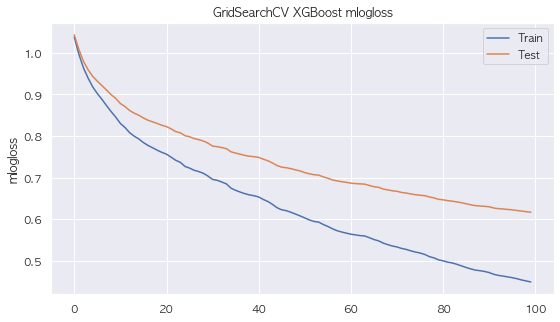

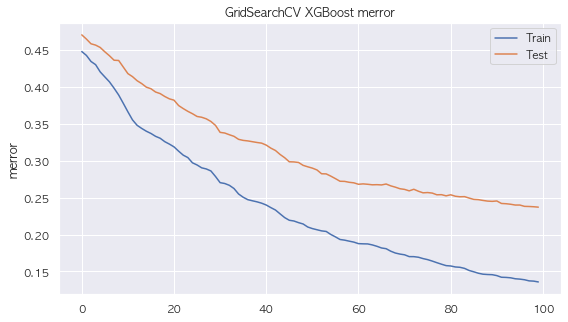


------------------ Confusion Matrix -----------------

[[1443  211  263]
 [ 295 1159  404]
 [  66   94 1688]]

-------------------- Key Metrics --------------------

Accuracy: 0.76
Balanced Accuracy: 0.76

Micro Precision: 0.76
Micro Recall: 0.76
Micro F1-score: 0.76

Macro Precision: 0.77
Macro Recall: 0.76
Macro F1-score: 0.76

Weighted Precision: 0.77
Weighted Recall: 0.76
Weighted F1-score: 0.76

--------------- Classification Report ---------------

              precision    recall  f1-score   support

           0       0.80      0.75      0.78      1917
           1       0.79      0.62      0.70      1858
           2       0.72      0.91      0.80      1848

    accuracy                           0.76      5623
   macro avg       0.77      0.76      0.76      5623
weighted avg       0.77      0.76      0.76      5623

---------------------- XGBoost ----------------------


In [291]:
## ---------- XGBoost model v1 ----------
## base run of model with default hyperparameters

xgb_clf = xgb.XGBClassifier(objective='multi:softmax', 
                            num_class=3, 
                            missing=1, 
                            early_stopping_rounds=10, 
                            eval_metric=['merror','mlogloss'], 
                            seed=42)
xgb_clf.fit(X_train, 
            y_train,
            verbose=0, # set to 1 to see xgb training round intermediate results
            eval_set=[(X_train, y_train), (X_test, y_test)])

# preparing evaluation metric plots
results = xgb_clf.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

# xgboost 'mlogloss' plot
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
plt.ylabel('mlogloss')
plt.title('GridSearchCV XGBoost mlogloss')
plt.show()

# xgboost 'merror' plot
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
plt.ylabel('merror')
plt.title('GridSearchCV XGBoost merror')
plt.show()

## ---------- Model Classification Report ----------
## get predictions and create model quality report

y_pred = xgb_clf.predict(X_test)

print('\n------------------ Confusion Matrix -----------------\n')
print(confusion_matrix(y_test, y_pred))

print('\n-------------------- Key Metrics --------------------')
print('\nAccuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Balanced Accuracy: {:.2f}\n'.format(balanced_accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

print('\n--------------- Classification Report ---------------\n')
print(classification_report(y_test, y_pred))
print('---------------------- XGBoost ----------------------') # unnecessary fancy styling

[21:26:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/Users/choejeehyuk/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/choejeehyuk/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


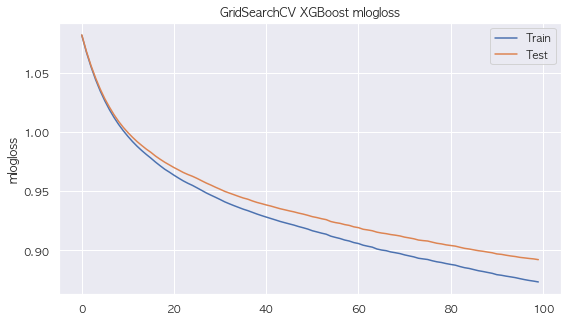

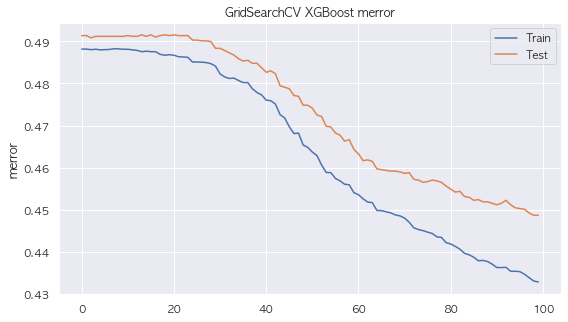


------------------ Confusion Matrix -----------------

[[ 780  258  879]
 [ 415  532  911]
 [  10   50 1788]]

Accuracy: 0.55
Balanced Accuracy: 0.55

Micro Precision: 0.55
Micro Recall: 0.55
Micro F1-score: 0.55

Macro Precision: 0.59
Macro Recall: 0.55
Macro F1-score: 0.52

Weighted Precision: 0.59
Weighted Recall: 0.55
Weighted F1-score: 0.52

--------------- Classification Report ---------------

              precision    recall  f1-score   support

           0       0.65      0.41      0.50      1917
           1       0.63      0.29      0.39      1858
           2       0.50      0.97      0.66      1848

    accuracy                           0.55      5623
   macro avg       0.59      0.55      0.52      5623
weighted avg       0.59      0.55      0.52      5623

---------------------- XGBoost ----------------------


In [292]:
## ---------- XGBoost model v2 ----------
## second run of model with "optimized" hyperparameters 

# declaring and fitting xgb classifier
xgb_clf = xgb.XGBClassifier(objective='multi:softmax', 
                            num_class=3, 
                            missing=1,
                            gamma=0, # default gamma value
                            learning_rate=0.1,
                            max_depth=3,
                            reg_lambda=1, # default L2 value
                            subsample=1, # default subsample value
                            colsample_bytree=1, # default colsample_bytree value
                            early_stopping_rounds=10,
                            eval_metric=['merror','mlogloss'],
                            seed=42)
xgb_clf.fit(X_train, 
            y_train,
            verbose=0, # set to 1 to see xgb training round intermediate results
            #sample_weight=sample_weights, # class weights to combat unbalanced 'target'
            eval_set=[(X_train, y_train), (X_test, y_test)])

# preparing evaluation metric plots
results = xgb_clf.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

# xgboost 'mlogloss' plot
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
plt.ylabel('mlogloss')
plt.title('GridSearchCV XGBoost mlogloss')
plt.show()

# xgboost 'merror' plot
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
plt.ylabel('merror')
plt.title('GridSearchCV XGBoost merror')
plt.show()

## ---------- Model Classification Report ----------
## get predictions and create model quality report

y_pred = xgb_clf.predict(X_test)

print('\n------------------ Confusion Matrix -----------------\n')
print(confusion_matrix(y_test, y_pred))

print('\nAccuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Balanced Accuracy: {:.2f}\n'.format(balanced_accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

print('\n--------------- Classification Report ---------------\n')
print(classification_report(y_test, y_pred))
print('---------------------- XGBoost ----------------------') # unnecessary fancy styling

[21:26:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/Users/choejeehyuk/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/choejeehyuk/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


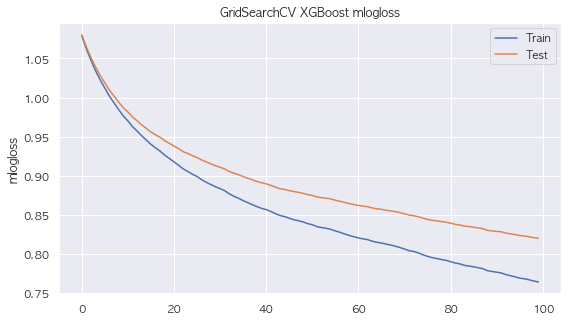

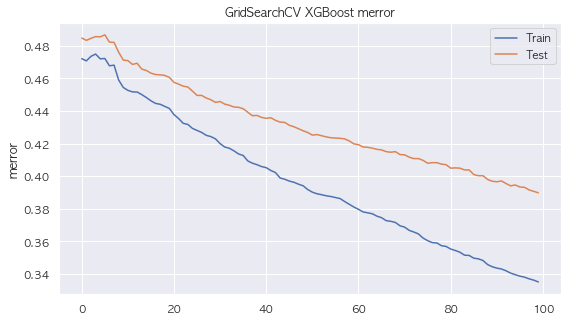


------------------ Confusion Matrix -----------------

[[ 954  241  722]
 [ 391  703  764]
 [  25   49 1774]]

Accuracy: 0.61
Balanced Accuracy: 0.61

Micro Precision: 0.61
Micro Recall: 0.61
Micro F1-score: 0.61

Macro Precision: 0.65
Macro Recall: 0.61
Macro F1-score: 0.59

Weighted Precision: 0.65
Weighted Recall: 0.61
Weighted F1-score: 0.59

--------------- Classification Report ---------------

              precision    recall  f1-score   support

           0       0.70      0.50      0.58      1917
           1       0.71      0.38      0.49      1858
           2       0.54      0.96      0.69      1848

    accuracy                           0.61      5623
   macro avg       0.65      0.61      0.59      5623
weighted avg       0.65      0.61      0.59      5623

---------------------- XGBoost ----------------------


In [293]:
## ---------- XGBoost model v3 ----------
## third run of model with "optimized" hyperparameters and
## attempting to treat unbalanced target classes

# balancing 'target' class weights
sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=y_train)

# declaring and fitting xgb classifier
xgb_clf = xgb.XGBClassifier(objective='multi:softmax', 
                            num_class=3, 
                            missing=1,
                            gamma=0, # default gamma value
                            learning_rate=0.1,
                            max_depth=5, # re-optimized from v2
                            reg_lambda=1, # default L2 value
                            #subsample=0.8, # tried but not ideal
                            #colsample_bytree=0.3, # tried but not ideal
                            early_stopping_rounds=10,
                            eval_metric=['merror','mlogloss'],
                            seed=42)
xgb_clf.fit(X_train, 
            y_train,
            verbose=0, # set to 1 to see xgb training round intermediate results
            sample_weight=sample_weights, # class weights to combat unbalanced 'target'
            eval_set=[(X_train, y_train), (X_test, y_test)])

# preparing evaluation metric plots
results = xgb_clf.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

# xgboost 'mlogloss' plot
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
plt.ylabel('mlogloss')
plt.title('GridSearchCV XGBoost mlogloss')
plt.show()

# xgboost 'merror' plot
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
plt.ylabel('merror')
plt.title('GridSearchCV XGBoost merror')
plt.show()

## ---------- Model Classification Report ----------
## get predictions and create model quality report

y_pred = xgb_clf.predict(X_test)

print('\n------------------ Confusion Matrix -----------------\n')
print(confusion_matrix(y_test, y_pred))

print('\nAccuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Balanced Accuracy: {:.2f}\n'.format(balanced_accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

print('\n--------------- Classification Report ---------------\n')
print(classification_report(y_test, y_pred))
print('---------------------- XGBoost ----------------------') # unnecessary fancy styling

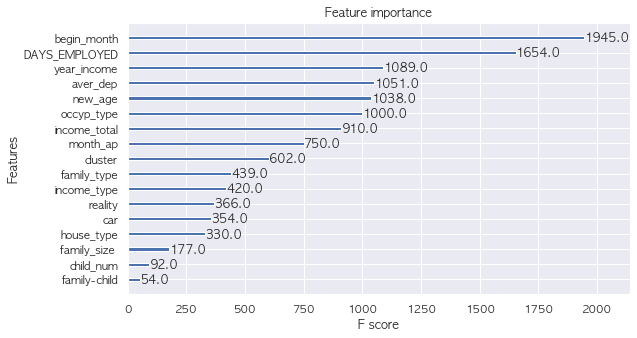

In [252]:
## ---------- Plot Feature Importance ----------
## plotting feature importance of best xgboost model (v3)

from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(9,5))
plot_importance(xgb_clf, ax=ax)
plt.show()